In [173]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Step 1: Generate a simple dataset with two classes
X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6]])
y = np.array([0, 0, 0, 1, 1, 1])  # Two classes: 0 and 1


In [174]:

# Display the dataset
print("Dataset:")
for i in range(len(X)):
    print(f"X{i}: {X[i]} - Class: {y[i]}")


Dataset:
X0: [1 1] - Class: 0
X1: [2 2] - Class: 0
X2: [3 3] - Class: 0
X3: [4 4] - Class: 1
X4: [5 5] - Class: 1
X5: [6 6] - Class: 1


In [181]:

# Step 2: Implement bootstrapping to create multiple bootstrap samples
n_samples = len(X)
n_trees = 3  # Number of decision trees (ensemble size)
bootstrap_samples = []

for _ in range(n_trees):
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    bootstrap_X = X[indices]
    bootstrap_y = y[indices]
    bootstrap_samples.append((bootstrap_X, bootstrap_y))


In [183]:
# Display the bootstrap samples
print("\nBootstrap Samples:")
for i, (X_bootstrap, y_bootstrap) in enumerate(bootstrap_samples):
    print(f"Bootstrap Sample {i + 1}:")
    for j in range(len(X_bootstrap)):
        print(f"X{j}: {X_bootstrap[j]} - Class: {y_bootstrap[j]}")



Bootstrap Samples:
Bootstrap Sample 1:
X0: [6 6] - Class: 1
X1: [2 2] - Class: 0
X2: [5 5] - Class: 1
X3: [1 1] - Class: 0
X4: [5 5] - Class: 1
X5: [2 2] - Class: 0
Bootstrap Sample 2:
X0: [6 6] - Class: 1
X1: [4 4] - Class: 1
X2: [5 5] - Class: 1
X3: [2 2] - Class: 0
X4: [6 6] - Class: 1
X5: [3 3] - Class: 0
Bootstrap Sample 3:
X0: [5 5] - Class: 1
X1: [5 5] - Class: 1
X2: [6 6] - Class: 1
X3: [3 3] - Class: 0
X4: [5 5] - Class: 1
X5: [2 2] - Class: 0


In [177]:
# Example data
feature_2_values = np.array([6, 1, 2, 5, 5, 3])  # Second feature values in Bootstrap Sample 1

# Sort unique feature 2 values
unique_feature_2_values = np.sort(np.unique(feature_2_values))

best_threshold = None
best_gini = float('inf')

# Calculate Gini impurity for each possible split
for i in range(len(unique_feature_2_values) - 1):
    threshold = (unique_feature_2_values[i] + unique_feature_2_values[i + 1]) / 2
    left_class_0 = np.sum(feature_2_values < threshold)
    left_class_1 = np.sum(feature_2_values >= threshold)
    right_class_0 = len(feature_2_values) - left_class_0
    right_class_1 = len(feature_2_values) - left_class_1

    gini_left = 1 - ((left_class_0 / (left_class_0 + left_class_1)) ** 2 +
                     (left_class_1 / (left_class_0 + left_class_1)) ** 2)
    gini_right = 1 - ((right_class_0 / (right_class_0 + right_class_1)) ** 2 +
                      (right_class_1 / (right_class_0 + right_class_1)) ** 2)
    
    # Calculate weighted average Gini impurity
    gini = (left_class_0 + left_class_1) / len(feature_2_values) * gini_left + \
           (right_class_0 + right_class_1) / len(feature_2_values) * gini_right
    
    if gini < best_gini:
        best_gini = gini
        best_threshold = threshold

print(f"Best threshold value for feature 2: {best_threshold}, Gini impurity: {best_gini}")


Best threshold value for feature 2: 1.5, Gini impurity: 0.5555555555555554


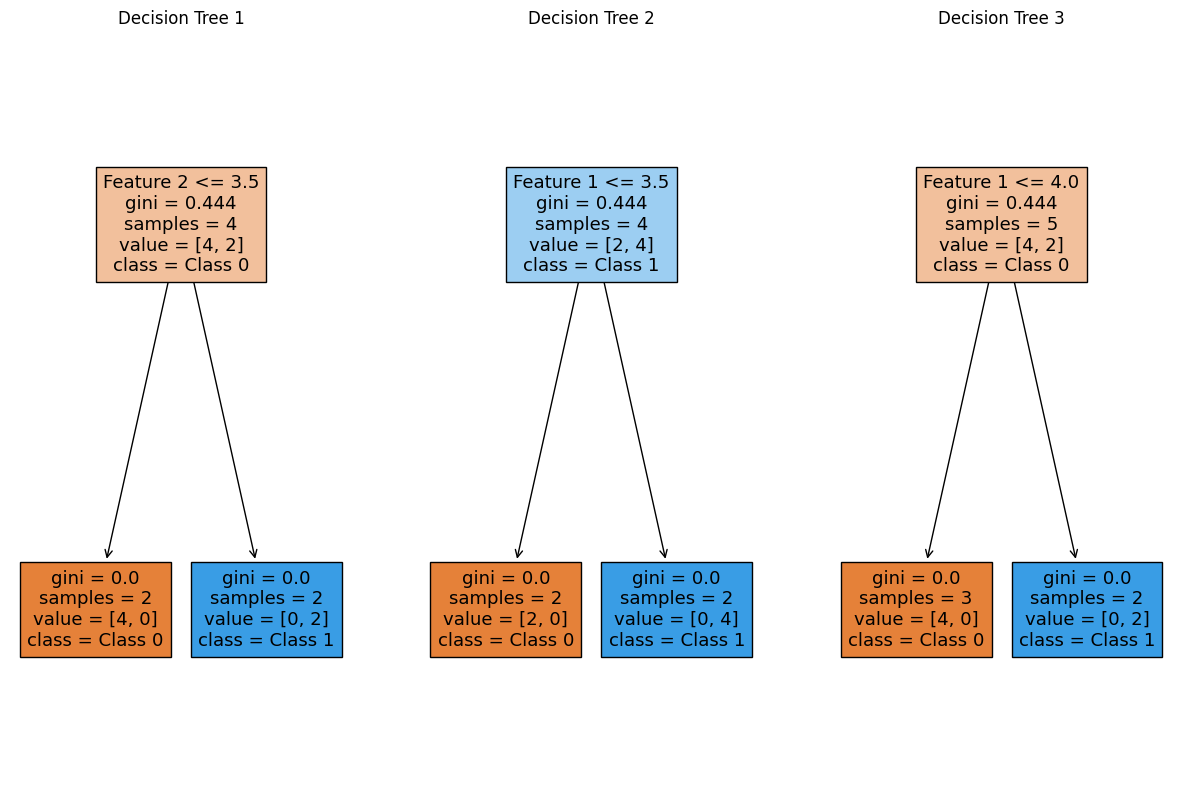

In [178]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Step 3: Train a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=n_trees, random_state=42)
random_forest.fit(X, y)

# Visualize each decision tree in the Random Forest
plt.figure(figsize=(15, 10))

for i, tree in enumerate(random_forest.estimators_):
    plt.subplot(1, n_trees, i + 1)
    plot_tree(tree, filled=True, class_names=["Class 0", "Class 1","Class 3"], feature_names=["Feature 1", "Feature 2","Feature 3"])
    plt.title(f"Decision Tree {i + 1}")

plt.show()


In [179]:

# Step 4: Aggregate the predictions of all decision trees through voting
def ensemble_voting(X, ensemble):
    predictions = [tree.predict(X) for tree in ensemble]
    return np.mean(predictions, axis=0)


In [180]:

# Example of voting
test_data = np.array([[3, 3], [6, 6]])  # Test data
predictions = ensemble_voting(test_data, decision_trees)
print("\nVoting Results:")
for i in range(len(predictions)):
    print(f"Test Data {i + 1} - Predicted Class: {predictions[i]}")



Voting Results:
Test Data 1 - Predicted Class: 0.0
Test Data 2 - Predicted Class: 1.0
